# 10.5 Lab -2 : Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import matplotlib.pyplot as plt
%matplotlib inline

## 10.5.1K-Means Clustering

In [2]:
# set seed 
np.random.seed(2)
X = np.random.normal(size = (50,2))
X[:25,0] += 3 
X[:25,1] -= 4

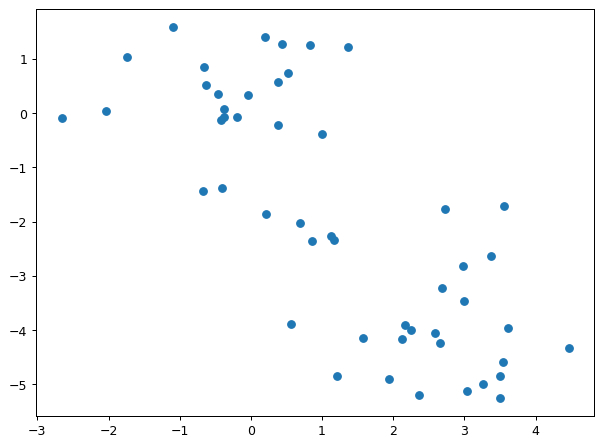

In [8]:
plt.figure(figsize=(8, 6), dpi=90)
plt.scatter(X[:,0],X[:,1])

In [9]:
clustering = KMeans(n_clusters = 2,n_init=20)
clustering.fit(X)

KMeans(n_clusters=2, n_init=20)

In [10]:
clusters = clustering.predict(X)

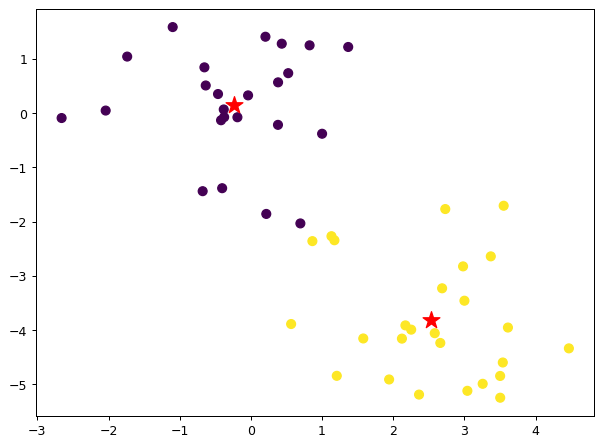

In [11]:
plt.figure(figsize=(8, 6), dpi=90)

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50)

centers = clustering.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],marker = '*', c='red', s=200, alpha=1)

In [12]:
np.bincount(clusters)
# 24 obs are classified in cluster 1, and 26 in cluster 2/

array([24, 26], dtype=int64)

### Using different values of n_init for k  = 3

Text(0.5, 1.0, 'N_init = 20')

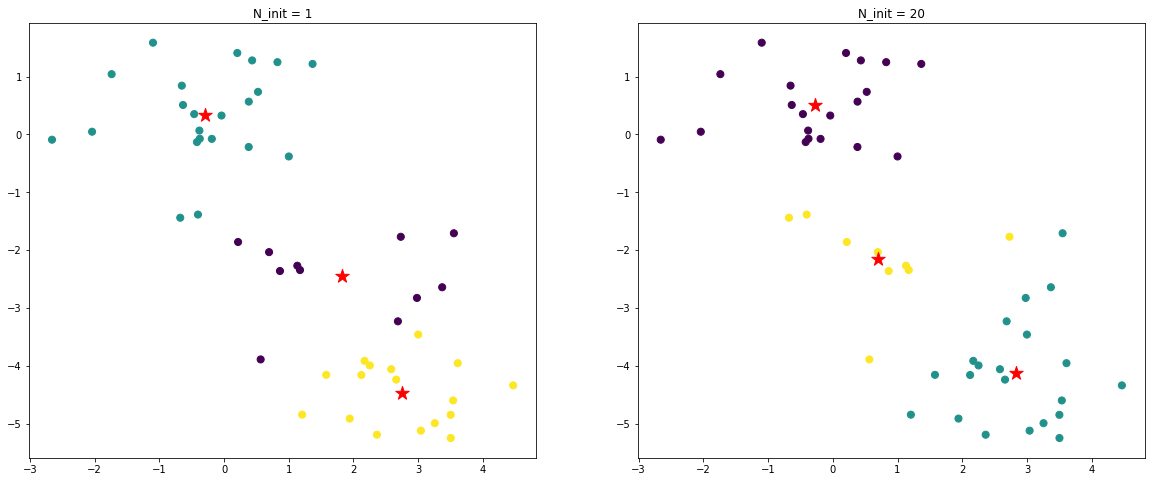

In [13]:
fig,ax = plt.subplots(1,2,figsize = (20,8))

# n_init = 1
clustering = KMeans(n_clusters = 3,n_init=1)
clustering.fit(X)

clusters = clustering.predict(X)

ax[0].scatter(X[:, 0], X[:, 1], c=clusters, s=50)

centers = clustering.cluster_centers_
ax[0].scatter(centers[:, 0], centers[:, 1],marker = '*', c='red', s=200, alpha=1)
ax[0].set_title('N_init = 1')

# n_init = 20
clustering = KMeans(n_clusters = 3,n_init=20)
clustering.fit(X)

clusters = clustering.predict(X)

ax[1].scatter(X[:, 0], X[:, 1], c=clusters, s=50)

centers = clustering.cluster_centers_
ax[1].scatter(centers[:, 0], centers[:, 1],marker = '*', c='red', s=200, alpha=1)
ax[1].set_title('N_init = 20')

We can see from above that almost all of the points are in same cluterts in both of the graphs, except the one we see in the middle right part. <br>
It is suggested that we should not go for a very small value of n_init

## 10.5.2  Hierarchical Clustering

In [14]:
# before applying hierachical clutering lets scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Mean of first feature before scaling - ',X[:,0].mean())
print('Mean of first feature after scaling - ',X_scaled[:,0].mean())
# after scaling, its pretty close to 0

Mean of first feature before scaling -  1.2021804941282386
Mean of first feature after scaling -  2.3293866835416566e-16


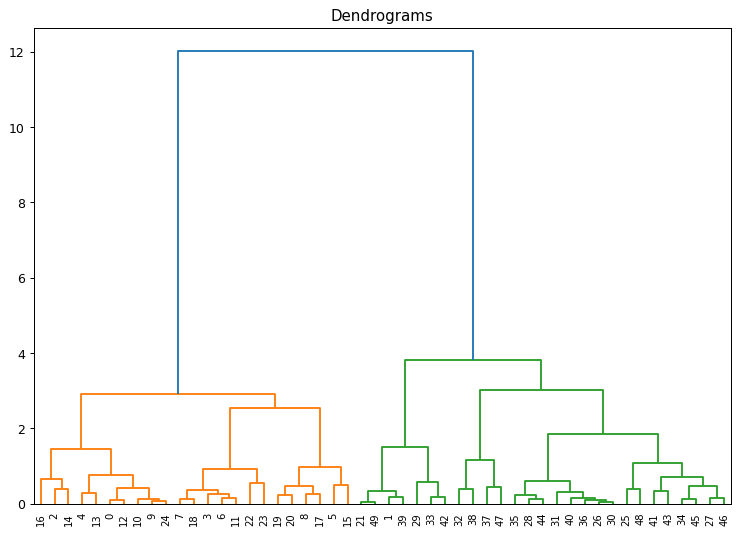

In [15]:
# dendrogram
plt.figure(figsize=(10, 7), dpi=90)  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

### Using heirachical clustering for clustering points in 2 groups

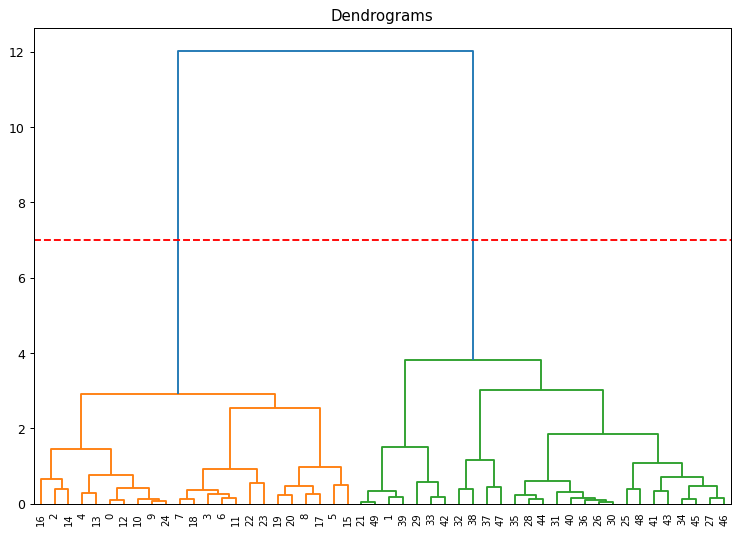

In [16]:
plt.figure(figsize=(10, 7), dpi=90)  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y = 7,c = 'red',linestyle = '--')

In [17]:
#getting predictions 
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
# affinity here is the method used for calucating distance, and through linkage we can speify the different types 
# of linkages
cluster.fit_predict(X_scaled)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int64)

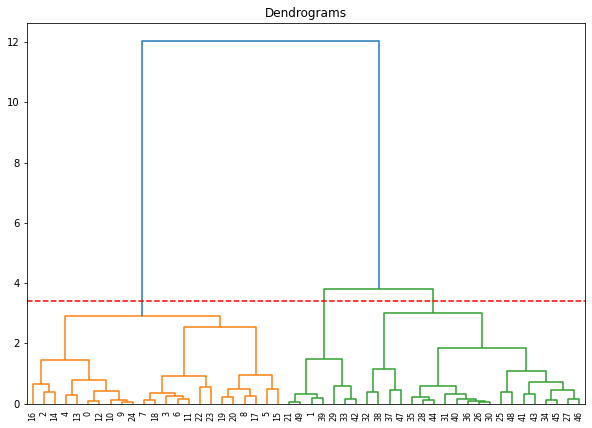

In [18]:
# 3 CLUTERSabs
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y = 3.4,c = 'red',linestyle = '--')

#getting predictions 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
# affinity here is the method used for calucating distance, and through linkage we can speify the different types 
# of linkages
cluster.fit_predict(X_scaled)